Retrieving ThermoDoc documents:   0%|          | 0/125 [00:00<?, ?it/s]

/var/folders/9y/b4f_p91d0q7cx9mmbyp6g2440000gn/T/ipykernel_19472/584405351.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


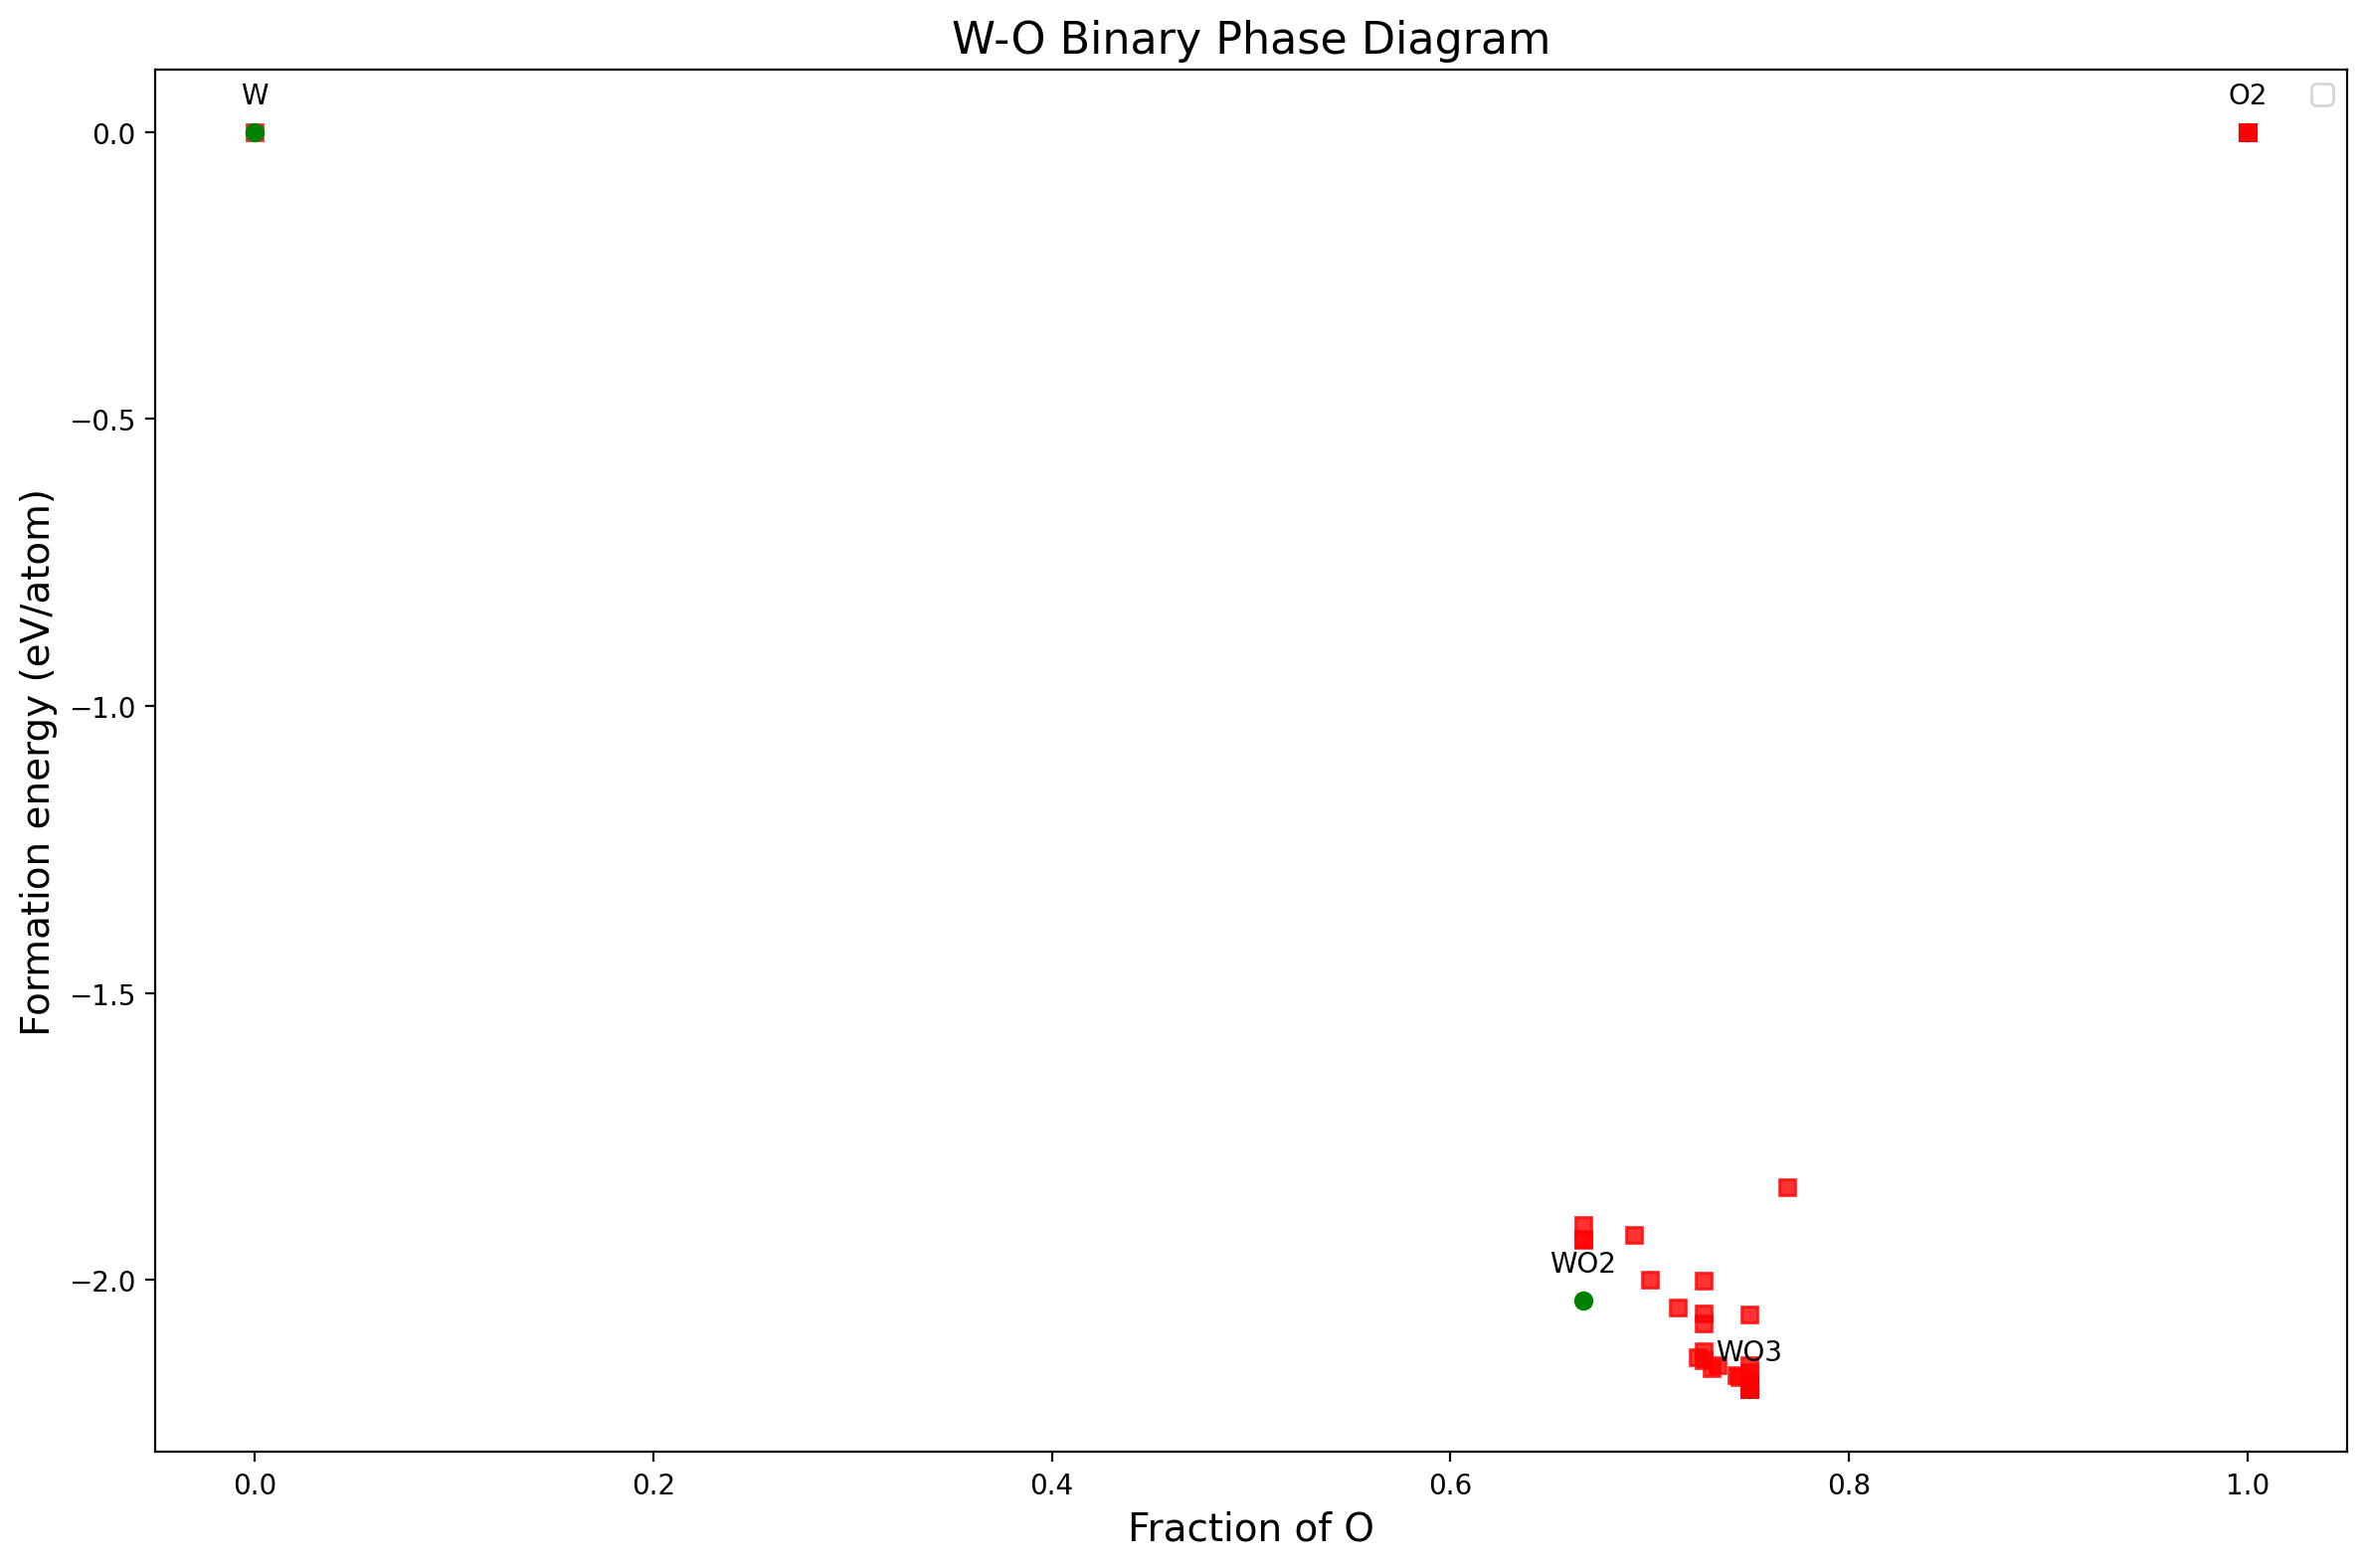

Number of stable phases: 4
Stable phases:
  O2
  WO2
  W
  WO3

Stable compositions with formation energies:
  WO2: -2.037 eV/atom
  WO3: -2.191 eV/atom

Number of stable phases: 4
Stable phases (Material IDs):
O2 (mp-12957-GGA)
WO2 (mp-19372-GGA+U)
W (mp-91-GGA)
WO3 (mp-2383161-GGA+U)

Displaying XRD patterns for stable phases:
  Fetching XRD for mp-12957-GGA...


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

  Fetching XRD for mp-19372-GGA+U...


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

  Fetching XRD for mp-91-GGA...


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

  Fetching XRD for mp-2383161-GGA+U...


Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

In [3]:
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram
from pymatgen.analysis.phase_diagram import PDPlotter
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

%matplotlib inline

%config InlineBackend.figure_format = 'retina'

APIK = "jwZUSi2JHGGJFy4U3YRVwNngmK9GZq3P" 

element1 = "W"
element2 = "O"

WO = (element1, element2)

with MPRester(APIK) as mpr:
    entries = mpr.get_entries_in_chemsys (WO)
    P_D = PhaseDiagram(entries)


    plt.figure(figsize = (12, 8))

    for entry in entries: 
        comp = entry.composition
        if comp.is_element:
            if comp.elements[0] == P_D.elements[1]:
                x = 1.0
            else:
                x = 0.0
        else:
            x=comp.get_atomic_fraction(P_D.elements[1])

        if comp.is_element:
            y=0
        else:
            y=P_D.get_form_energy_per_atom(entry)

        if entry in P_D.stable_entries:
            plt.plot(x,y,'go', markersize=6)
            plt.text(x,y+.05, entry.name, fontsize=10, ha='center')
        else:
            E_A_H = P_D.get_e_above_hull(entry)
            if E_A_H < .2:
                    plt.plot (x, y, 'rs', markersize=6, alpha =.8)

    hull_xs = []
    hull_ys = []

hull_points = sorted(zip(hull_xs, hull_ys))
hull_xs = [point[0] for point in hull_points]
hull_ys = [point[1] for point in hull_points]
    
    # Draw the convex hull
plt.plot(hull_xs, hull_ys, 'k-', linewidth=2)
    
    # Add title and labels
plt.title(f"{element1}-{element2} Binary Phase Diagram", fontsize=16)
plt.xlabel(f"Fraction of {element2}", fontsize=14)
plt.ylabel("Formation energy (eV/atom)", fontsize=14) 
plt.legend() 
plt.tight_layout()
plt.show()
    
# Print information about the stable phases
stable_entries = P_D.stable_entries
print(f"Number of stable phases: {len(stable_entries)}")
print("Stable phases:")
for entry in stable_entries:
    print(f"  {entry.name}")
    
# Calculate and print formation energies
print("\nStable compositions with formation energies:")
for entry in stable_entries:
    if not entry.composition.is_element:  # Skip the pure elements
        form_e = P_D.get_form_energy_per_atom(entry)
        print(f"  {entry.name}: {form_e:.3f} eV/atom")
stable_entries = P_D.stable_entries
stable_material_ids = []
print(f"\nNumber of stable phases: {len(stable_entries)}")
print("Stable phases (Material IDs):")
for entry in stable_entries:
    material_id = entry.entry_id
    if material_id:
        stable_material_ids.append(material_id)
        print(f"{entry.name} ({material_id})")
    else:
        print(f"{entry.name} (No Material ID found)")

class XRDDisplayer:
  
        #Creates the object for the XRD API to call using Material_ID from the above selected items.

        def __init__(self, api_key, wavelength="CuKa"):
        
            #Initializes the XRDDisplayer with a Materials Project API key and wavelength.
            
            self.api_key = api_key
            self.wavelength = wavelength
            self.mpr = MPRester(api_key)
            self.xrd_calculator = XRDCalculator(wavelength=self.wavelength)

        def __call__(self, material_id):
            #Fetches and displays the XRD pattern for the given material ID.

            try:
                structure = self.mpr.get_structure_by_material_id(material_id)
                if structure:
                    sga = SpacegroupAnalyzer(structure)
                    conventional_structure = sga.get_conventional_standard_structure()
                    pattern = self.xrd_calculator.get_pattern(conventional_structure)

                    plt.figure()
                    plt.plot(pattern.x, pattern.y)
                    plt.xlabel("2$\\theta$")
                    plt.ylabel("Intensity")
                    plt.title(f"XRD Pattern for {material_id}")
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"Warning: Structure not found for Material ID: {material_id}")
            except Exception as e:
                print(f"Error getting XRD for {material_id}: {e}")

    # Create an instance of the XRDDisplayer
xrd_displayer = XRDDisplayer(APIK)

    # Display XRD patterns for stable materials using the callable object
print("\nDisplaying XRD patterns for stable phases:")
for material_id in stable_material_ids:
    print(f"  Fetching XRD for {material_id}...")
    xrd_displayer(material_id)

